#### CMSE 201 Final Project
### &#9989; Griffin Frendo 
### &#9989; Section_003
#### &#9989; 12/10/20

# Politics and Data Science

## Background and Motivation

For this project I decided to answer 2 questions with various parts:

The first question that I decided to answer was how accurately could Numpy's polyfit predict the 2020 presidential election. Going off of this, I wanted to see how different rated pollsters (ratings from FiveThirtyEight) predicted the election. 

The second question that I decided to answer is why people don't vote. Through this question I wanted to see how people's  incomes and education levels impacted their decisions  whether or not to vote. 


The reason why I wanted to complete this project was because politics is very interesting to me. I wanted to double major in political science but it was too much with my current schedule.  Politics mean a lot to me and I wanted to explore datatsets that had to do with politics because we didn't do much of it in class. Politics also is a very hot topic right now but instead of looking at policy, I would rather look at the numbers behind politics. 



The Polling Data comes from: https://projects.economist.com/us-2020-forecast/president (at the bottom of the page)

Voting Data comes from: https://github.com/fivethirtyeight/data/tree/master/non-voters

Pollster ratings come from: https://projects.fivethirtyeight.com/pollster-ratings/





# Methodology

In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #This is because there are a lot of warnings and it runis the flow of code.

### Part one: Polling and Pollsters 

In [2]:
original_poll_data = pd.read_csv("2020 US presidential election polls - all_polls.csv", header = 0) #Importing Data with pandas


original_poll_data.head() #Making sure it was read in correctly

,state,pollster,sponsor,start.date,end.date,entry.date.time..et.,number.of.observations,population,mode,biden,trump,biden_margin,other,undecided,url,include,notes
0,MT,Change Research,NaN,10/29/2020,11/2/2020,11/2/2020 23:42,920,lv,Online,45,50,-5,2.0,NaN,https://docs.google.com/spreadsheets/d/1TyQc9r...,True,NaN
1,ME,Change Research,NaN,10/29/2020,11/2/2020,11/2/2020 23:42,1024,lv,Online,52,40,12,6.0,NaN,https://docs.google.com/spreadsheets/d/1TyQc9r...,True,NaN
2,IA,Change Research,NaN,10/29/2020,11/1/2020,11/2/2020 23:42,1084,lv,Online,47,47,0,3.0,NaN,https://docs.google.com/spreadsheets/d/1TyQc9r...,True,NaN
3,WI,Change Research,NaN,10/29/2020,11/1/2020,11/2/2020 23:42,553,lv,Online,53,45,8,NaN,NaN,https://docs.google.com/spreadsheets/d/1TyQc9r...,True,NaN
4,PA,Change Research,NaN,10/29/2020,11/1/2020,11/2/2020 23:42,699,lv,Online,50,46,4,NaN,NaN,https://docs.google.com/spreadsheets/d/1TyQc9r...,True,NaN


In [3]:
poll_data = original_poll_data[["state", "pollster", "end.date","biden", "trump"]] #Only taking in neseccary columns


poll_data.head() #Making sure this is everything I need going forward.

,state,pollster,end.date,biden,trump
0,MT,Change Research,11/2/2020,45,50
1,ME,Change Research,11/2/2020,52,40
2,IA,Change Research,11/1/2020,47,47
3,WI,Change Research,11/1/2020,53,45
4,PA,Change Research,11/1/2020,50,46


In [4]:
poll_rating = []


for val in poll_data["pollster"]:
    
    if val == "Marist College" or val == "Monmouth University" or val == "ABC News/Washington Post" or val == "NYT/Siena College" or val == "Selzer & Co." or val == "Muhlenberg College":
        poll_rating.append("A+")
        
    elif val == "SurveyUSA" or val == "Suffolk University" or val == "NBC News/Wall Street Journal":
        poll_rating.append("A")
            
    elif val == "Emerson College" or val == "Siena College" or val == "Fox News/Beacon Research/Shaw & Co. Research" or val == "RKM Research and Communications Inc." or val == "NBC News/The Wall Street Journal" :
        poll_rating.append("A-")
        
    elif val == "Fairleigh Dickinson University (PublicMind)" or val == "Cygnal" or val== "TIPP" or val == "Georgetown University Battleground Poll" or val == "Marquette University Law School" or val =="Public Religion Research Institute" or val == "Data Orbital" or val == "IBD/TIPP" or val == "MassINC Polling Group" or val == "University of North Florida":
        poll_rating.append("A/B")
    
    elif val == "CNN" or val == "Quinnipiac University" or val == "Mason-Dixon Polling & Strategy" or val == "Public Opinion Strategies" or val == "Angus Reid Global" or val == "EPIC-MRA" or val == "Research & Polling Inc." or val == "Mason-Dixon Polling & Research Inc.":
        poll_rating.append("B+")
        
    elif val == "YouGov" or val == "Public Policy Polling" or val == "GQR Research" or val == "Landmark Communications":
        poll_rating.append("B")
        
    elif val == "Ipsos" or val == "Research Co.":
        poll_rating.append("B-")
        
    elif val == "Morning Consult" or val == "The Tyson Group" or val == "Florida Atlantic University" or val == "BK Strategies" or val == "ALG Research" or val == "Franklin & Marshall College" or val == "Latino Decisions" or val == "Marketing Resource Group (MRG)" or val == "Glengariff Group" or val == "Glengariff Group" or val == "MSR Group" or val == "Benenson Strategy Group/GS Strategy Group" or val == "University of Maryland" or val == "Garin-Hart-Yang Research Group" or val == "Optimus" or val == "Franklin Pierce University" or val == "Pew Research Center" or val == "Global Strategy Group" or val == "East Carolina University" or val == "GBAO" or val == "Sacred Heart University" or val == "Roanoke College" or val =="SSRS" or val == "Y2 Analytics B" or val == "St. Cloud State University" or val == "Civiqs" or val == "Keating Research" or val == "Victory Research" or val == "David Binder Research" or val == "AtlasIntel" or val == "RMG Research" or val == "Data for Progress" or val == "Cole Hargrave Snodgrass & Associates" or val== "USC Dornsife":
        poll_rating.append("B/C")
    
    elif val == "Gravis Marketing" or val == "St Pete Polls" or val == "The Harris Poll":
        poll_rating.append("C")
    
    elif val == "Change Research" or val == "Mitchell Research & Communications" or val == "Trafalgar Group" or val == "Remington Research Group":
        poll_rating.append("C-")
        
    elif val == "Targoz Market Research" or val == "Point Blank Political" or val == "CPEC" or val == "Saint Leo University":
        poll_rating.append("C/D")
    
    elif val == "SurveyMonkey":
        poll_rating.append("D-")
    
    elif val == "Redfield & Wilton Strategies" or val == "Clearview Reseach" or val == "Battleground Connect" or val == "Fabrizio Ward/Hart Research Associates" or val == "University of Georgia" or val == "Harper Polling" or val == "TargetSmart" or val == "Expedition Strategies" or val == "Hodas & Associates" or val == "Market Research Group" or val == "Kiaer Research" or val == "Fordham University" or val == "TargetSmart/Dynata" or val == "Reuters" or val == "Abacus Data" or val == "PureSpectrum" or val == "UCLA Nationscape" or val == "Hart Research Associates" or val == "YouGov Blue" or val =="Leger" or val == "Hart Research Associates" or val == "Hofstra University" or val == "Lord Ashcroft Polls" or val == "Climate Nexus" or val == "Pollfish" or val == "Whitman Insight Strategies" or val == "Edison Research" or val == "Kaiser Family Foundation" or val == "NORC" or val == "J.L. Partners" or val == "Echelon Insights" or val == "Rethink Priorities" or val == "AYTM" or val == "University of Wyoming" or val == "Opimium" or val == "CES" or val == "Opinium" or val == "Tufts University":
        poll_rating.append("N/A")
        
    
    
    else:
        poll_rating.append("...")
        
poll_data['poll_rating'] = poll_rating       


The above cell is used to make a new column in the dataframe. This takes the poll ratings for the pollsters who ran a poll in Georgia and Pennsylvania, along with national polls.

The new column is created by making an empty list to start. It then starts with a for loop that goes through the length of all the pollsters, there are nested if and elif statments to correctly place each pollster with their rating. These ratings are appended to the correct pollster into the empty list. The new column is then made in the dataframe.

In [5]:
mask3 = poll_data["state"] == "--" 


national_polls_df = poll_data[mask3]

#_________________________________________________________________

mask4 = poll_data["state"] == "PA" 


PA_polls_df = poll_data[mask4]

#_________________________________________________________________

mask5 = poll_data["state"] == "GA" 


GA_polls_df = poll_data[mask5]

The above cell is creating three seperate dataframes from the original dataframe using masks. The three dataframes represent national polling, Pennsylavia polling and Georgia polling. 

#### National Polling

In [6]:
national_dates_two = national_polls_df["end.date"] #isolating dates as a variable

In [7]:
national_dates_one = pd.to_datetime(national_dates_two) #changing the type so that padas is reading these as dates, not strings

In [8]:
national_dates_one.dtype #Checking data type

dtype('<M8[ns]')

In [9]:
national_dates = national_dates_one.values.astype(float) #Changing the dtype so numpy can read it

In [10]:
national_dates.dtype #Checking converted datatype

dtype('float64')

The reason why I had to code the above cells is because for some reason, numpy does not like <M8[ns] dtype. It is a conversion issue between numpy and pandas. 

In [11]:
#Biden national Fit

biden_national_parameters = np.polyfit(national_dates, national_polls_df["biden"], 3)
biden_national_function = np.poly1d(biden_national_parameters)
biden_national_y = biden_national_function(national_dates)


#---------------------------------------------------------------------------------------------------

#Trump national Fit

trump_national_parameters = np.polyfit(national_dates, national_polls_df["trump"], 3)
trump_national_function = np.poly1d(trump_national_parameters)
trump_national_y = trump_national_function(national_dates)

The above cell was written to create the best fit line for both Biden and Trump. I used numpy's polyfit.

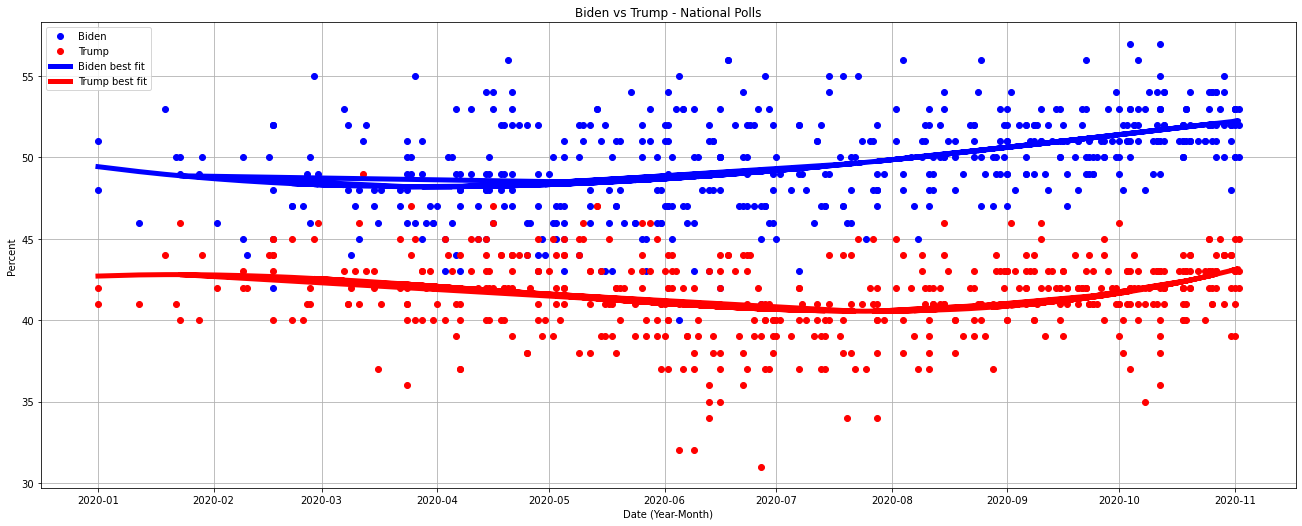

In [12]:
national_polls_df["end.date"] = pd.to_datetime(national_polls_df["end.date"]) # This line has to be in here to make sure that matplotlib reads these as dates, not strings

plt.figure(figsize = (18,7))

#The blow Cell is plotting thr data
plt.plot_date(national_polls_df["end.date"], national_polls_df["biden"], label = "Biden", color = "blue")
plt.plot_date(national_polls_df["end.date"], national_polls_df["trump"], label = "Trump", color = "red")
plt.plot(national_polls_df["end.date"], biden_national_y , label = "Biden best fit", color = "blue", linewidth = 5)
plt.plot(national_polls_df["end.date"], trump_national_y, label = "Trump best fit", color = "red", linewidth = 5)

#Making changes to the plots apperence 
plt.tight_layout()
plt.grid()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - National Polls")


plt.savefig("national_fit_all.png", bbox_inches='tight') #Saving figure to call it later. If you do not use "bbox_inches='tight'" the image cuts off when I call in results.

In [13]:
mask6 = national_polls_df["poll_rating"] == "A+"

aplus_national_polls_df = national_polls_df[mask6]

Masking the national polls to just get the A+ pollsters. 

In [14]:
aplus_national_dates_two = aplus_national_polls_df["end.date"] #isolating dates as a variable

aplus_national_dates_one = pd.to_datetime(aplus_national_dates_two) #Making it into dates

aplus_national_dates = aplus_national_dates_one.values.astype(float) #Making it into flot so it can be plotted

In [15]:
#Biden national Fit - aplus

biden_aplus_national_parameters = np.polyfit(aplus_national_dates, aplus_national_polls_df["biden"], 3)
biden_aplus_national_function = np.poly1d(biden_aplus_national_parameters)
biden_aplus_national_y = biden_aplus_national_function(aplus_national_dates)


#---------------------------------------------------------------------------------------------------

#Trump national Fit - aplus

trump_aplus_national_parameters = np.polyfit(aplus_national_dates, aplus_national_polls_df["trump"], 3)
trump_aplus_national_function = np.poly1d(trump_aplus_national_parameters)
trump_aplus_national_y = trump_aplus_national_function(aplus_national_dates)

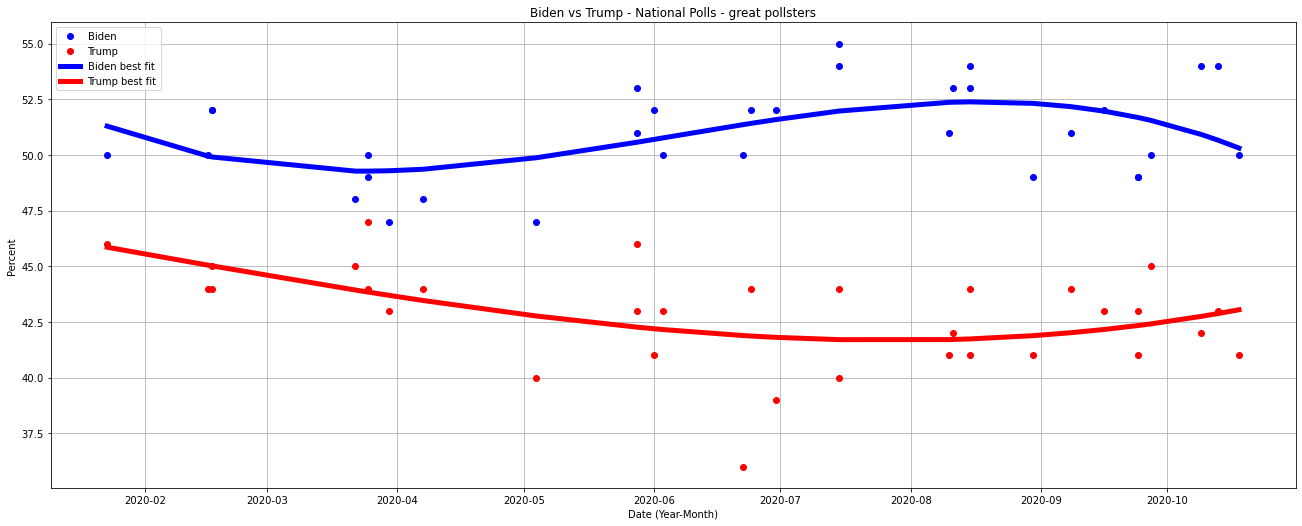

In [16]:
aplus_national_polls_df["end.date"] = pd.to_datetime(aplus_national_polls_df["end.date"]) # This line has to be in here to make sure that matplotlib reads these as dates, not strings

plt.figure(figsize = (18,7))


plt.plot_date(aplus_national_polls_df["end.date"], aplus_national_polls_df["biden"], label = "Biden", color = "blue")
plt.plot_date(aplus_national_polls_df["end.date"], aplus_national_polls_df["trump"], label = "Trump", color = "red")
plt.plot(aplus_national_polls_df["end.date"], biden_aplus_national_y , label = "Biden best fit", color = "blue", linewidth = 5)
plt.plot(aplus_national_polls_df["end.date"], trump_aplus_national_y, label = "Trump best fit", color = "red", linewidth = 5)


plt.tight_layout()
plt.grid()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - National Polls - great pollsters")


plt.savefig("national_fit_great_pollsters.png", bbox_inches='tight')

In [17]:
bad_national_polls_df = national_polls_df[(national_polls_df["poll_rating"] == "D-") | (national_polls_df["poll_rating"] == "C/D") | (national_polls_df["poll_rating"] == "C-") | (national_polls_df["poll_rating"] == "C") ]



The above cell was written for bad pollsters. To make sure there were enough polls, I included four seperate ratings.

In [18]:
bad_national_dates_two = bad_national_polls_df["end.date"] #isolating dates as a variable

bad_national_dates_one = pd.to_datetime(bad_national_dates_two) #Making it into dates 

bad_national_dates = bad_national_dates_one.values.astype(float) #Making it float

In [19]:
#Biden national Fit - bad

biden_bad_national_parameters = np.polyfit(bad_national_dates, bad_national_polls_df["biden"], 3)
biden_bad_national_function = np.poly1d(biden_bad_national_parameters)
biden_bad_national_y = biden_bad_national_function(bad_national_dates)


#---------------------------------------------------------------------------------------------------

#Trump national Fit - bad

trump_bad_national_parameters = np.polyfit(bad_national_dates, bad_national_polls_df["trump"], 3)
trump_bad_national_function = np.poly1d(trump_bad_national_parameters)
trump_bad_national_y = trump_bad_national_function(bad_national_dates)

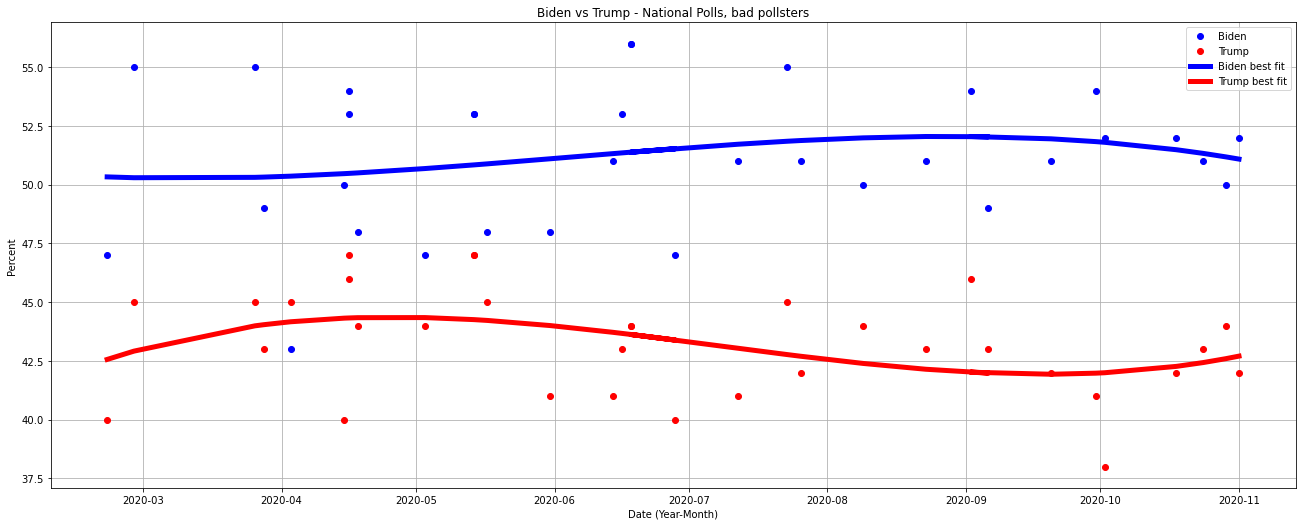

In [20]:
bad_national_polls_df["end.date"] = pd.to_datetime(bad_national_polls_df["end.date"]) # This line has to be in here to make sure that matplotlib reads these as dates, not strings

plt.figure(figsize = (18,7))


plt.plot_date(bad_national_polls_df["end.date"], bad_national_polls_df["biden"], label = "Biden", color = "blue")
plt.plot_date(bad_national_polls_df["end.date"], bad_national_polls_df["trump"], label = "Trump", color = "red")
plt.plot(bad_national_polls_df["end.date"], biden_bad_national_y , label = "Biden best fit", color = "blue", linewidth = 5)
plt.plot(bad_national_polls_df["end.date"], trump_bad_national_y, label = "Trump best fit", color = "red", linewidth = 5)


plt.tight_layout()
plt.grid()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - National Polls, bad pollsters")

plt.savefig("national_fit_bad_pollsters.png", bbox_inches='tight')



### I wanted to make a note here for the grader: I'm not going to comment and explain most of the next code for this section. It is very, very similar code to the above code in this section, 

#### Georgia Polling

In [21]:
ga_dates_two = GA_polls_df["end.date"]

ga_dates_one = pd.to_datetime(ga_dates_two)

ga_dates = ga_dates_one.values.astype(float)

In [22]:
biden_ga_parameters = np.polyfit(ga_dates, GA_polls_df["biden"], 3)
biden_ga_function = np.poly1d(biden_ga_parameters)
biden_ga_y = biden_ga_function(ga_dates)

trump_ga_parameters = np.polyfit(ga_dates, GA_polls_df["trump"], 3)
trump_ga_function = np.poly1d(trump_ga_parameters)
trump_ga_y = trump_ga_function(ga_dates)

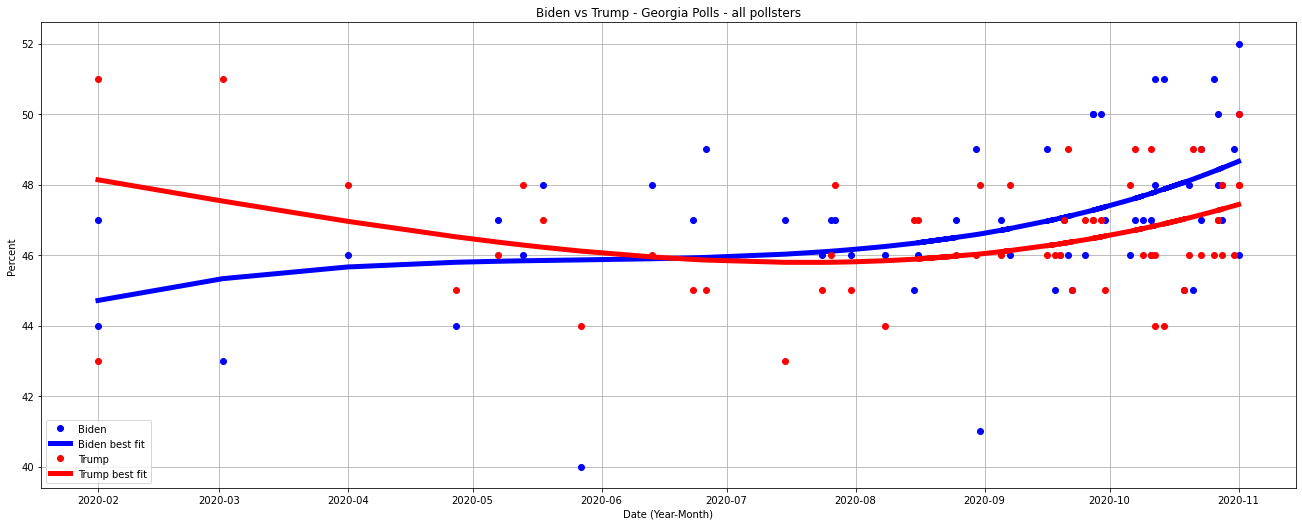

In [23]:
GA_polls_df["end.date"] = pd.to_datetime(GA_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(GA_polls_df["end.date"], GA_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(GA_polls_df["end.date"], biden_ga_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(GA_polls_df["end.date"], GA_polls_df["trump"], label = "Trump", color = "red")
plt.plot(GA_polls_df["end.date"], trump_ga_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Georgia Polls - all pollsters")

plt.savefig("georgia_fit_all.png", bbox_inches='tight')

In [24]:
good_ga_polls_df = GA_polls_df[(GA_polls_df["poll_rating"] == "A+") | (GA_polls_df["poll_rating"] == "A") | (GA_polls_df["poll_rating"] == "A-") | (GA_polls_df["poll_rating"] == "A/B")| (GA_polls_df["poll_rating"] == "B+")| (GA_polls_df["poll_rating"] == "B")]

In [25]:
good_ga_dates_two = good_ga_polls_df["end.date"]

good_ga_dates_one = pd.to_datetime(good_ga_dates_two)

good_ga_dates = good_ga_dates_one.values.astype(float)

In [26]:
biden_good_ga_parameters = np.polyfit(good_ga_dates, good_ga_polls_df["biden"], 3)
biden_good_ga_function = np.poly1d(biden_good_ga_parameters)
biden_good_ga_y = biden_good_ga_function(good_ga_dates)

trump_good_ga_parameters = np.polyfit(good_ga_dates, good_ga_polls_df["trump"], 3)
trump_good_ga_function = np.poly1d(trump_good_ga_parameters)
trump_good_ga_y = trump_good_ga_function(good_ga_dates)

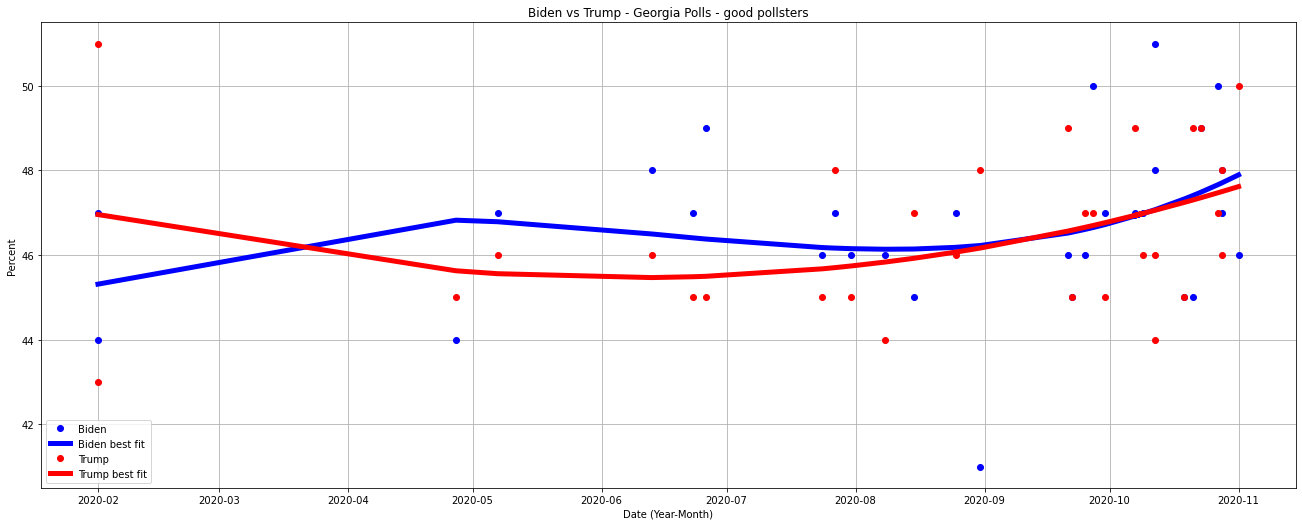

In [27]:
good_ga_polls_df["end.date"] = pd.to_datetime(good_ga_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(good_ga_polls_df["end.date"], good_ga_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(good_ga_polls_df["end.date"], biden_good_ga_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(good_ga_polls_df["end.date"], good_ga_polls_df["trump"], label = "Trump", color = "red")
plt.plot(good_ga_polls_df["end.date"], trump_good_ga_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Georgia Polls - good pollsters")


plt.savefig("Georgia_fit_good_pollsters.png", bbox_inches='tight')

In [28]:
bad_ga_polls_df = GA_polls_df[(GA_polls_df["poll_rating"] == "B/C") | (GA_polls_df["poll_rating"] == "C-") ] #not a lot of bad pollsters did polls of gerogia


In [29]:
bad_ga_dates_two = bad_ga_polls_df["end.date"]

bad_ga_dates_one = pd.to_datetime(bad_ga_dates_two)

bad_ga_dates = bad_ga_dates_one.values.astype(float)

In [30]:
biden_bad_ga_parameters = np.polyfit(bad_ga_dates, bad_ga_polls_df["biden"], 3)
biden_bad_ga_function = np.poly1d(biden_bad_ga_parameters)
biden_bad_ga_y = biden_bad_ga_function(bad_ga_dates)

trump_bad_ga_parameters = np.polyfit(bad_ga_dates, bad_ga_polls_df["trump"], 3)
trump_bad_ga_function = np.poly1d(trump_bad_ga_parameters)
trump_bad_ga_y = trump_bad_ga_function(bad_ga_dates)

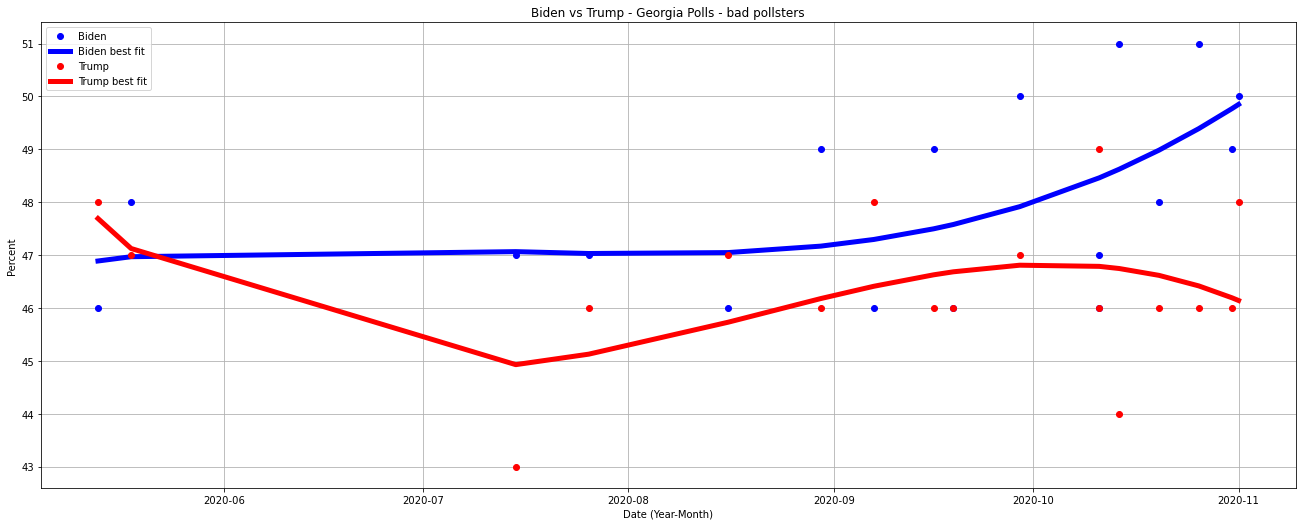

In [31]:
bad_ga_polls_df["end.date"] = pd.to_datetime(bad_ga_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(bad_ga_polls_df["end.date"], bad_ga_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(bad_ga_polls_df["end.date"], biden_bad_ga_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(bad_ga_polls_df["end.date"], bad_ga_polls_df["trump"], label = "Trump", color = "red")
plt.plot(bad_ga_polls_df["end.date"], trump_bad_ga_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Georgia Polls - bad pollsters")

plt.savefig("Georgia_fit_bad_pollsters.png", bbox_inches='tight')

#### Pennsylvania Polling

In [32]:
pa_dates_two = PA_polls_df["end.date"]

pa_dates_one = pd.to_datetime(pa_dates_two)

pa_dates = pa_dates_one.values.astype(float)

In [33]:
biden_pa_parameters = np.polyfit(pa_dates, PA_polls_df["biden"], 3)
biden_pa_function = np.poly1d(biden_pa_parameters)
biden_pa_y = biden_pa_function(pa_dates)

trump_pa_parameters = np.polyfit(pa_dates, PA_polls_df["trump"], 3)
trump_pa_function = np.poly1d(trump_pa_parameters)
trump_pa_y = trump_pa_function(pa_dates)

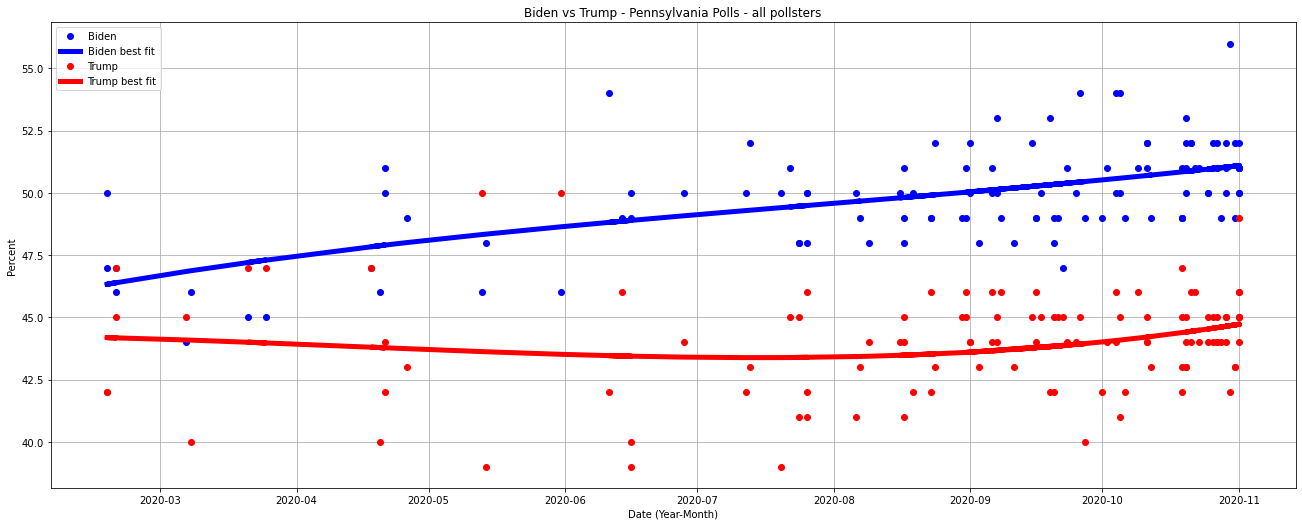

In [34]:
PA_polls_df["end.date"] = pd.to_datetime(PA_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(PA_polls_df["end.date"], PA_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(PA_polls_df["end.date"], biden_pa_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(PA_polls_df["end.date"], PA_polls_df["trump"], label = "Trump", color = "red")
plt.plot(PA_polls_df["end.date"], trump_pa_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Pennsylvania Polls - all pollsters")

plt.savefig("pennsylvania_fit_all.png", bbox_inches='tight')

In [35]:
good_pa_polls_df = PA_polls_df[(PA_polls_df["poll_rating"] == "A+") | (PA_polls_df["poll_rating"] == "A") | (PA_polls_df["poll_rating"] == "A-") | (PA_polls_df["poll_rating"] == "A/B")| (PA_polls_df["poll_rating"] == "B+")| (PA_polls_df["poll_rating"] == "B")]

In [36]:
good_pa_dates_two = good_pa_polls_df["end.date"]

good_pa_dates_one = pd.to_datetime(good_pa_dates_two)

good_pa_dates = good_pa_dates_one.values.astype(float)

In [37]:
biden_good_pa_parameters = np.polyfit(good_pa_dates, good_pa_polls_df["biden"], 3)
biden_good_pa_function = np.poly1d(biden_good_pa_parameters)
biden_good_pa_y = biden_good_pa_function(good_pa_dates)

trump_good_pa_parameters = np.polyfit(good_pa_dates, good_pa_polls_df["trump"], 3)
trump_good_pa_function = np.poly1d(trump_good_pa_parameters)
trump_good_pa_y = trump_good_pa_function(good_pa_dates)

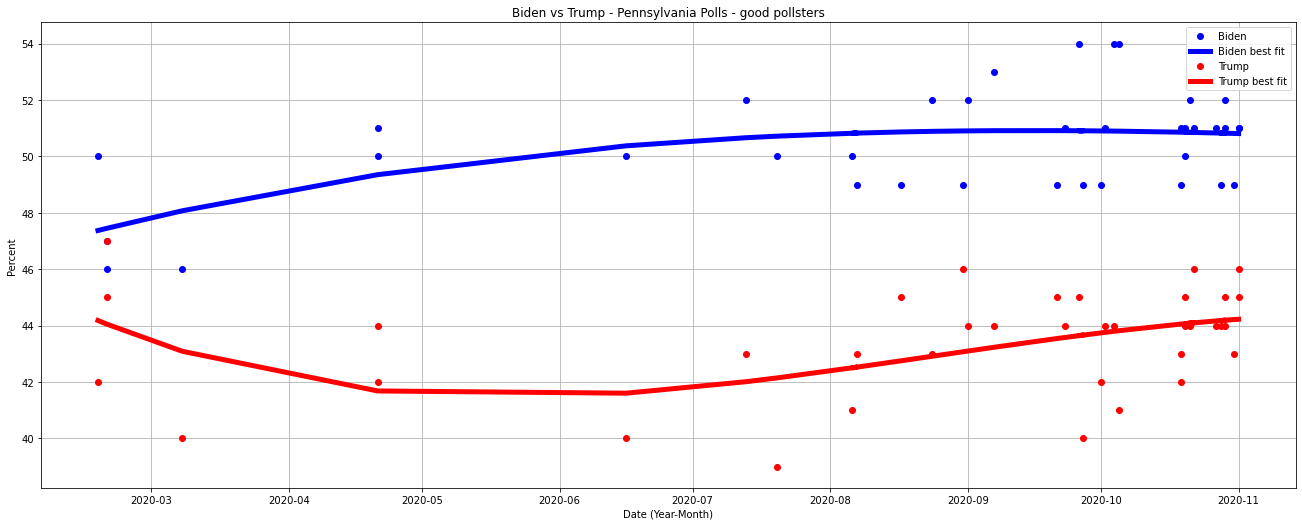

In [38]:
good_pa_polls_df["end.date"] = pd.to_datetime(good_pa_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(good_pa_polls_df["end.date"], good_pa_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(good_pa_polls_df["end.date"], biden_good_pa_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(good_pa_polls_df["end.date"], good_pa_polls_df["trump"], label = "Trump", color = "red")
plt.plot(good_pa_polls_df["end.date"], trump_good_pa_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Pennsylvania Polls - good pollsters")


plt.savefig("Pennsylvania_fit_good_pollsters.png", bbox_inches='tight')

In [39]:
bad_pa_polls_df = PA_polls_df[(PA_polls_df["poll_rating"] == "B/C") | (PA_polls_df["poll_rating"] == "C-") ] 


In [40]:
bad_pa_dates_two = bad_pa_polls_df["end.date"]

bad_pa_dates_one = pd.to_datetime(bad_pa_dates_two)

bad_pa_dates = bad_pa_dates_one.values.astype(float)

In [41]:
biden_bad_pa_parameters = np.polyfit(bad_pa_dates, bad_pa_polls_df["biden"], 3)
biden_bad_pa_function = np.poly1d(biden_bad_pa_parameters)
biden_bad_pa_y = biden_bad_pa_function(bad_pa_dates)

trump_bad_pa_parameters = np.polyfit(bad_pa_dates, bad_pa_polls_df["trump"], 3)
trump_bad_pa_function = np.poly1d(trump_bad_pa_parameters)
trump_bad_pa_y = trump_bad_pa_function(bad_pa_dates)

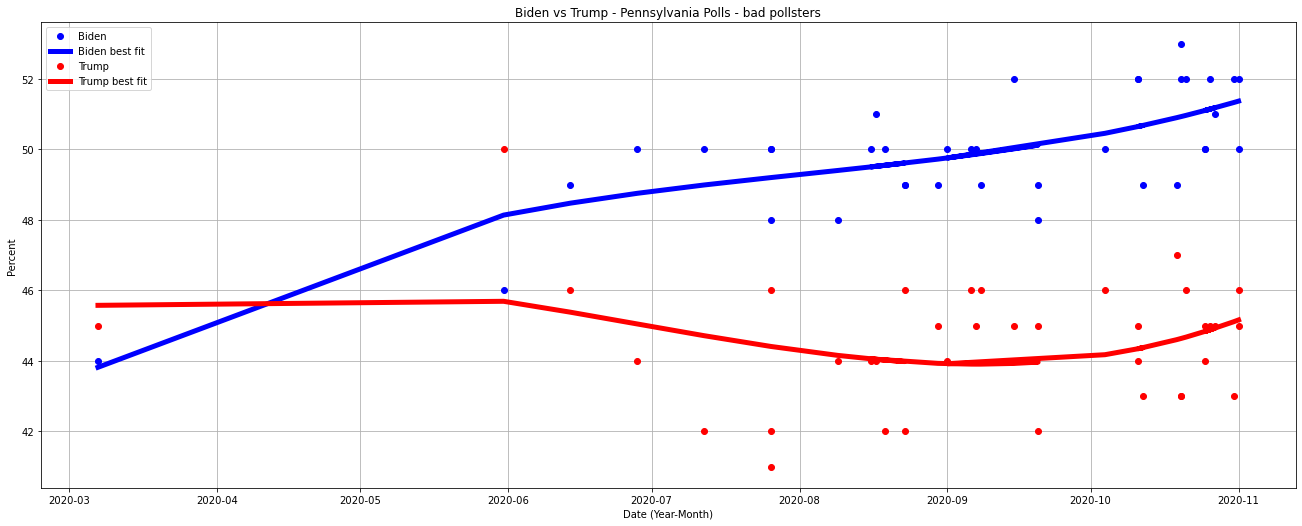

In [42]:
bad_pa_polls_df["end.date"] = pd.to_datetime(bad_pa_polls_df["end.date"])



plt.figure(figsize = (18,7))

plt.plot_date(bad_pa_polls_df["end.date"], bad_pa_polls_df["biden"], label = "Biden", color = "blue")
plt.plot(bad_pa_polls_df["end.date"], biden_bad_pa_y , label = "Biden best fit", color = "blue", linewidth = 5)

plt.plot_date(bad_pa_polls_df["end.date"], bad_pa_polls_df["trump"], label = "Trump", color = "red")
plt.plot(bad_pa_polls_df["end.date"], trump_bad_pa_y , label = "Trump best fit", color = "red", linewidth = 5)

plt.grid()
plt.tight_layout()
plt.legend()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percent')
plt.title("Biden vs Trump - Pennsylvania Polls - bad pollsters")

plt.savefig("pennsylvania_fit_bad_pollsters.png", bbox_inches='tight')

## Part Two: Why People Do Not Vote:

In [43]:
voterqs_df = pd.read_csv("nonvoters_data.csv", header = 0) #reading in data

In [44]:
voterqs_df.head() #making sure evrything is read in correctly

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [45]:
mask1 = voterqs_df["voter_category"] == "always"

always_voters = voterqs_df[mask1]


mask2 = voterqs_df["voter_category"] == "rarely/never"

never_voters = voterqs_df[mask2]

mask3 =   voterqs_df["voter_category"] == "sporadic"

sporadic_voters = voterqs_df[mask3]

This cell was written to create three seperate dataframes based on the type of voter they represent.

In [46]:
print("There are", len(never_voters) , "never/almost never voters")
print("There are", len(always_voters), "always voters")
print("There are", len(sporadic_voters), "sparadic voters")

There are 1451 never/almost never voters
There are 1811 always voters
There are 2574 sparadic voters


Seeing how many of each type of voters in the data set. 

#### Income Section

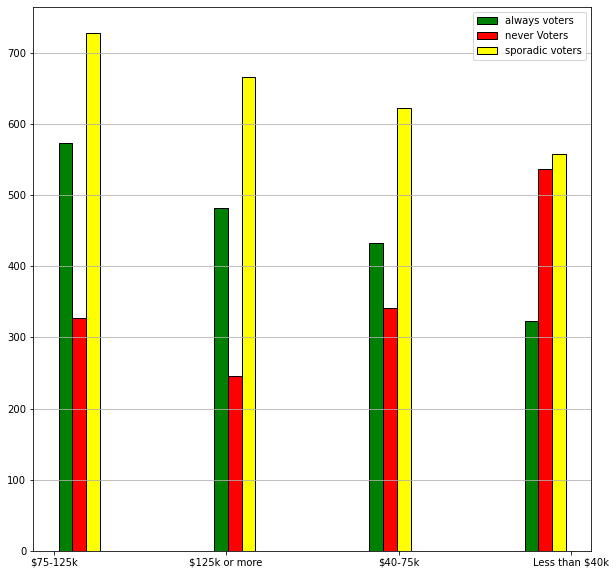

In [47]:
plt.figure(figsize=(10,10))

plt.hist([always_voters["income_cat"],never_voters["income_cat"], sporadic_voters["income_cat"]], color = ("green" , "red", "yellow"), label = ("always voters", "never Voters", "sporadic voters"),edgecolor='black')

plt.legend()
plt.grid(axis = "y")


plt.savefig("all_income_hist.png", bbox_inches='tight')

Creating a histogram of each type of voter based on their income level

In [48]:
def income_equation(income_level_column, voter_type_df): #Defining function, it will take in the income level column and the voter type 
    
   #All intial conditions Below 
    
    count = 0
    count2 = 0
    count3 = 0
    count4 = 0
    percent_list = []
    percent_list2 = []
    percent_list3 = []
    percent_list4 = []
  


  #starting with a for loop to go through the income level


    for val in income_level_column:
        
        
  #creating if and elif statements to sort the income level 

        if val == "Less than $40k":
            count += 1 
            percent = count/len(voter_type_df) * 100    #Getting the percent of people in the income level
            percent_list.append(percent) #Appending the the list that is for this income level 
        
        elif val == "$40-75k":
            count2 +=1
            percent2 = count2/len(voter_type_df) * 100
            percent_list2.append(percent2)       
        
        elif val == "$75-125k":
            count3 +=1
            percent3 = count3/len(voter_type_df) * 100
            percent_list3.append(percent3)

        elif val == "$125k or more":
            count4 +=1
            percent4 = count4/len(voter_type_df) * 100
            percent_list4.append(percent4)
    
    
    #I am returing the last number of the list becuase each percent is in the list, and I only want the last one 
    
    return round(percent_list[-1],2), round(percent_list2[-1],2) , round(percent_list3[-1],2) ,  round(percent_list4[-1],2)
            

Overall this function was defined beecuase it would take forever to go though each type. In a prior draft of this code, it was only a for loop therefore I would have to go though all four levels of income. 

In [49]:
income_percent_always = income_equation(always_voters["income_cat"], always_voters ) #precent of each type of income for alaways voters

In [50]:
income_percent_never = income_equation(never_voters["income_cat"], never_voters ) #precent of each type of income for never voters

In [51]:
income_percent_spor = income_equation(sporadic_voters["income_cat"], sporadic_voters ) #precent of each type of income for sporadic voters

#### Education Section

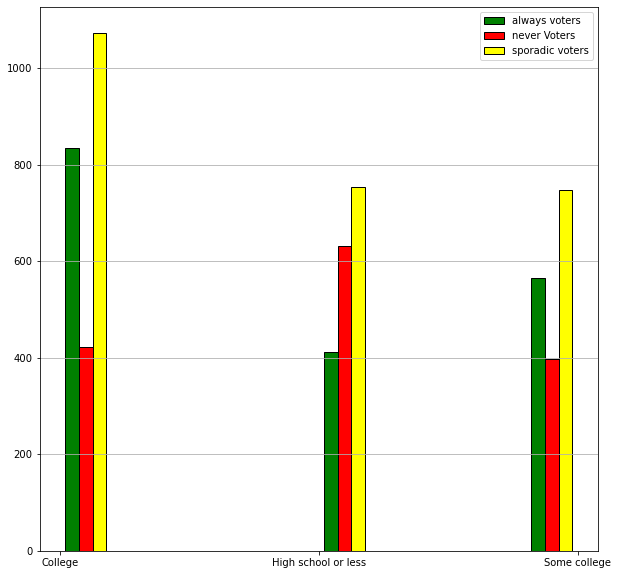

In [52]:
plt.figure(figsize=(10,10))

plt.hist([always_voters["educ"],never_voters["educ"], sporadic_voters["educ"]], color = ("green" , "red", "yellow"), label = ("always voters", "never Voters", "sporadic voters"),edgecolor='black')

plt.legend()
plt.grid(axis = "y")

plt.savefig("all_education_hist.png", bbox_inches='tight')

Creating a histogram of each type of voter based on their education level

In [53]:
def education_equation(education_level_column, voter_type_df):
    
    count5 = 0
    count6 = 0
    count7 = 0
    percent_list5 = []
    percent_list6 = []
    percent_list7 = []
    
    for val in education_level_column:
        if val == "High school or less":
            count5 += 1 
            percent5 = count5/len(voter_type_df) * 100
            percent_list5.append(percent5)
        
        elif val == "Some college":
            count6 +=1
            percent6 = count6/len(voter_type_df) * 100
            percent_list6.append(percent6)       
        
        elif val == "College":
            count7 +=1
            percent7 = count7/len(voter_type_df) * 100
            percent_list7.append(percent7)

    
    return round(percent_list5[-1],2), round(percent_list6[-1],2), round(percent_list7[-1],2)

The code above is basically Identical to the income equation. They were made for the same reasons. 

In [54]:
educ_percent_always = education_equation(always_voters["educ"], always_voters) #Education level for always voters

In [55]:
educ_percent_never = education_equation(never_voters["educ"], never_voters) #Education never for always voters

In [56]:
educ_percent_spor = education_equation(sporadic_voters["educ"], sporadic_voters) #Education level for sporadic voters

#### Important Question Section

In the lower parts of this project, I will explain why I chose these specific questions but so you can follow along I will outline the questions and the response types. The number the answer is. is the way it is written in the csv file.


###### Question 5: As far as making progress on the important issues facing the country, does it really matter who wins the 2020 presidential election, or will things be pretty much the same regardless of who is elected president?

Answers:
1. Who wins the election really matters 
2. Things will be pretty much the same

###### Question 6: In general, how many of the people in elected office today are like you?

Answers:
1. A lot
2. Some
3. Only a Few
4. None

###### Question 16: In general, how easy or difficult do you think it is to vote in national elections?

Answers: 
1. Very Easy
2. Somewhat Easy
3. Somewhat Difficult
4. Very Difficult



In [57]:
x = voterqs_df[(voterqs_df["Q5"] == 2)] #Masking For these conditions for Q5

y = x[(voterqs_df["Q16"] == 3) |(voterqs_df["Q16"] == 4)] #Masking the mask for these conditions for Q16

z = y[(voterqs_df["Q6"] == 3) | (voterqs_df["Q6"] == 4) ] #Masking the mask for these conditions for Q6

important_qs_assume_novote = z[["RespId", "Q5", "Q6", "Q16", "income_cat", "voter_category", "educ"]] #Setting the columns I need for the final mask to a final variable

The above code was written to predict the type of voter who most likely does not vote.

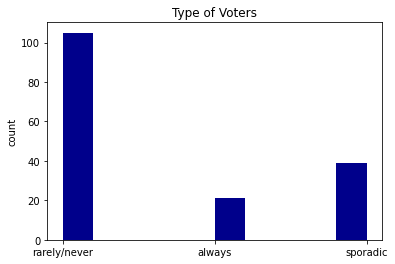

In [58]:
plt.hist(important_qs_assume_novote["voter_category"], color = "darkblue")#Histogram for the type of voters for this df 

plt.ylabel("count")

plt.title("Type of Voters")


plt.savefig("assumed_non_voters_type_hist.png", bbox_inches='tight')

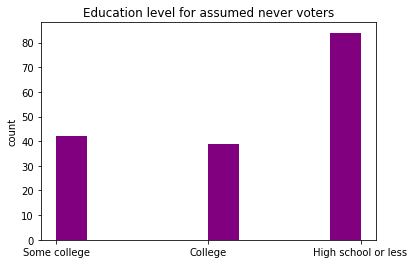

In [59]:
plt.hist(important_qs_assume_novote["educ"], color = "purple") #Histogram for the education level for this df 

plt.ylabel("count")

plt.title("Education level for assumed never voters")

plt.savefig("assumed_non_voters_educ_hist.png", bbox_inches='tight')

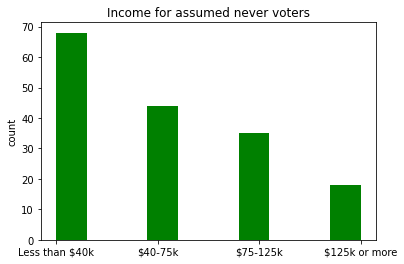

In [60]:
plt.hist(important_qs_assume_novote["income_cat"], color = "green") #Histogram for the income level for this df 

plt.ylabel("count")

plt.title("Income for assumed never voters")

plt.savefig("assumed_non_voters_income_hist.png", bbox_inches='tight')

The above three histograms above were made to see if I was successful in creating a dataframe that was a large majority of people that did not vote. After this, I wanted to see the income level and education level for these types of voters.

In [61]:
a = voterqs_df[(voterqs_df["Q5"] == 1)]

b = a[(voterqs_df["Q16"] == 1) |(voterqs_df["Q16"] == 2)]

c = b[(voterqs_df["Q6"] == 1) | (voterqs_df["Q6"] == 2) ]


important_qs_assume_alwaysvote = c[["RespId", "Q5", "Q6", "Q16", "income_cat", "voter_category", "educ"]]

This is very similar to the df above, except it is filtered for people who answered the opposite.

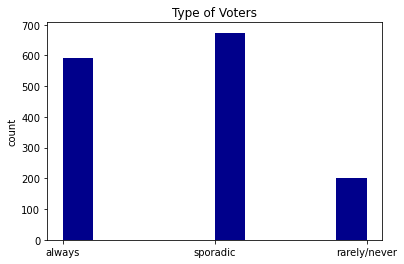

In [62]:
plt.hist(important_qs_assume_alwaysvote["voter_category"], color = "darkblue")

plt.ylabel("count")

plt.title("Type of Voters")

plt.savefig("assumed_always_voters_type_hist.png", bbox_inches='tight')

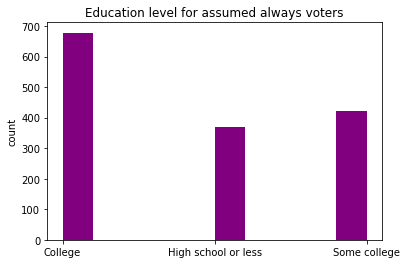

In [63]:
plt.hist(important_qs_assume_alwaysvote["educ"], color = "purple")

plt.ylabel("count")

plt.title("Education level for assumed always voters")

plt.savefig("assumed_always_voters_educ_hist.png", bbox_inches='tight')

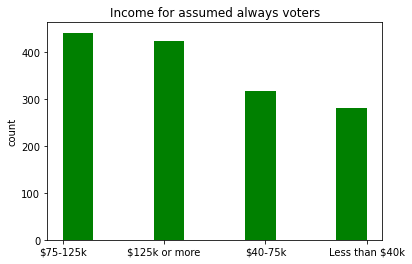

In [64]:
plt.hist(important_qs_assume_alwaysvote["income_cat"], color = "green")

plt.ylabel("count")

plt.title("Income for assumed always voters")

plt.savefig("assumed_always_voters_income_hist.png", bbox_inches='tight')

The above three histograms above were made to see if I was successful in creating a dataframe that was a large majority of people that always vote. After this, I wanted to see the income level and education level for these types of voters.

# Results

### Part One Results

#### National Results

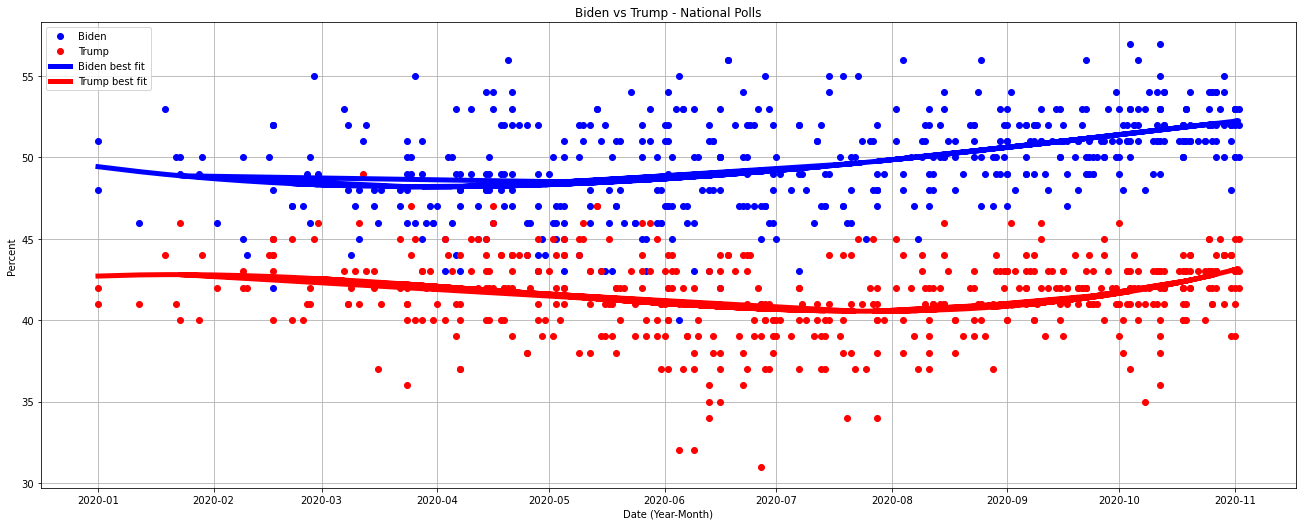

In [65]:
Image.open("national_fit_all.png")

In [66]:
print(biden_national_y[0])

print(trump_national_y[0])

52.22526490618475
43.106247736141086


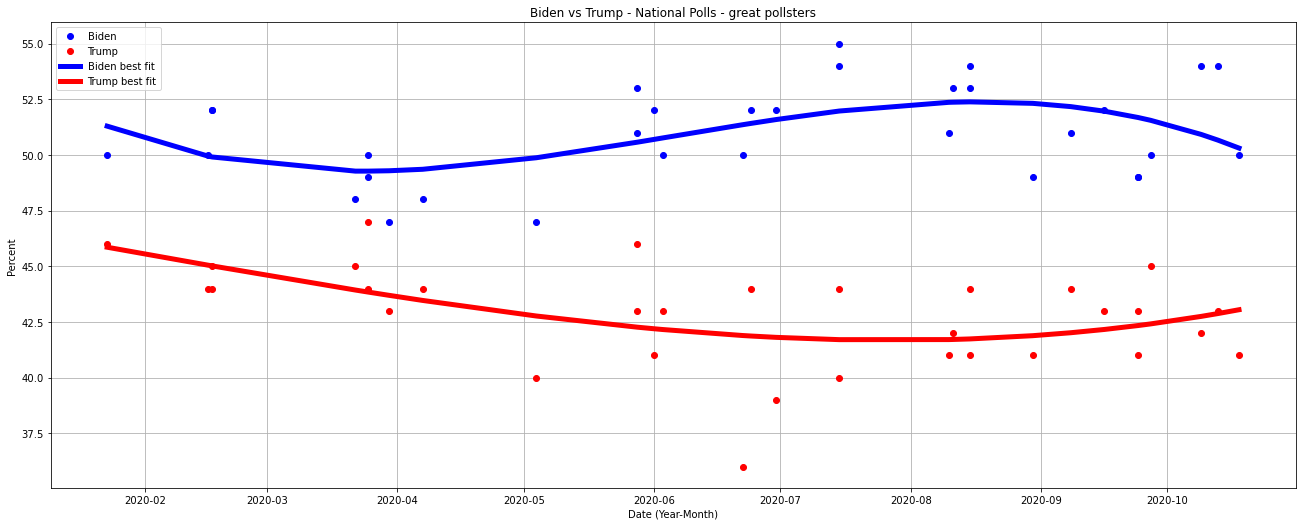

In [67]:
Image.open("national_fit_great_pollsters.png")

In [68]:
print(biden_aplus_national_y[0])

print(trump_aplus_national_y[0])

50.30637867003679
43.046256609028205


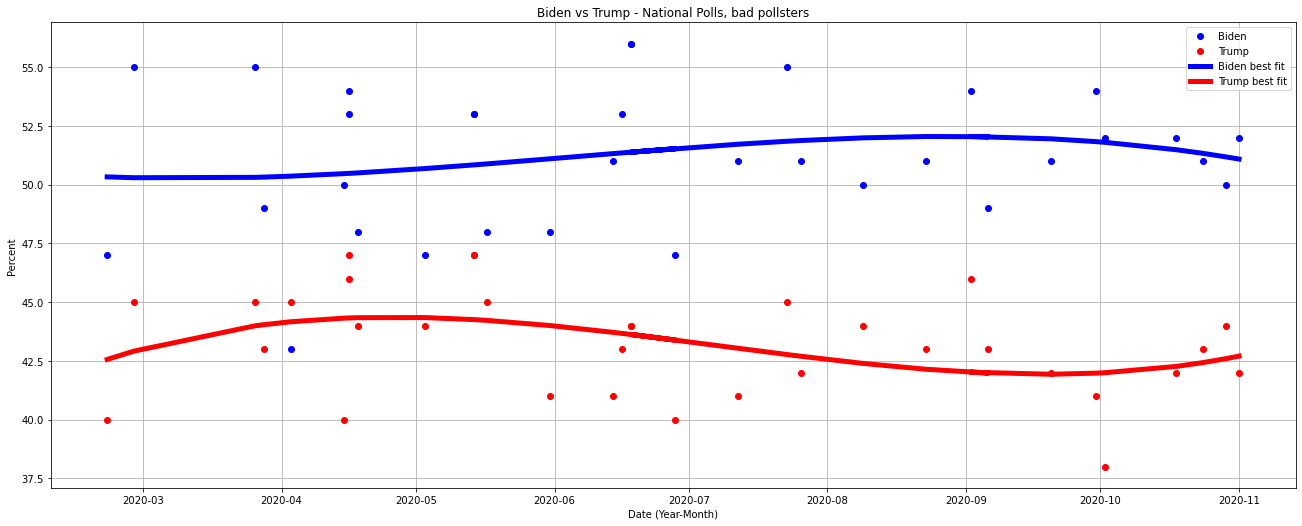

In [69]:
Image.open("national_fit_bad_pollsters.png")

In [70]:
print(biden_bad_national_y[0])

print(trump_bad_national_y[0])


51.08471144363284
42.70243812352419


#### Georgia Results

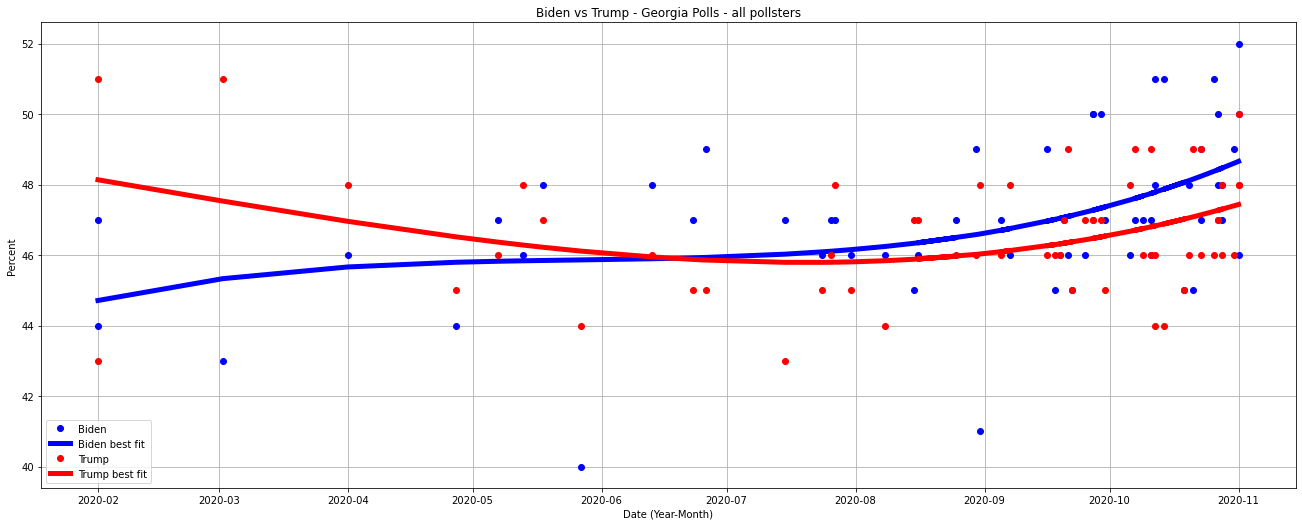

In [71]:
Image.open("georgia_fit_all.png")

In [72]:
print(biden_ga_y[0])

print(trump_ga_y[0])

48.659146775025874
47.43609769362956


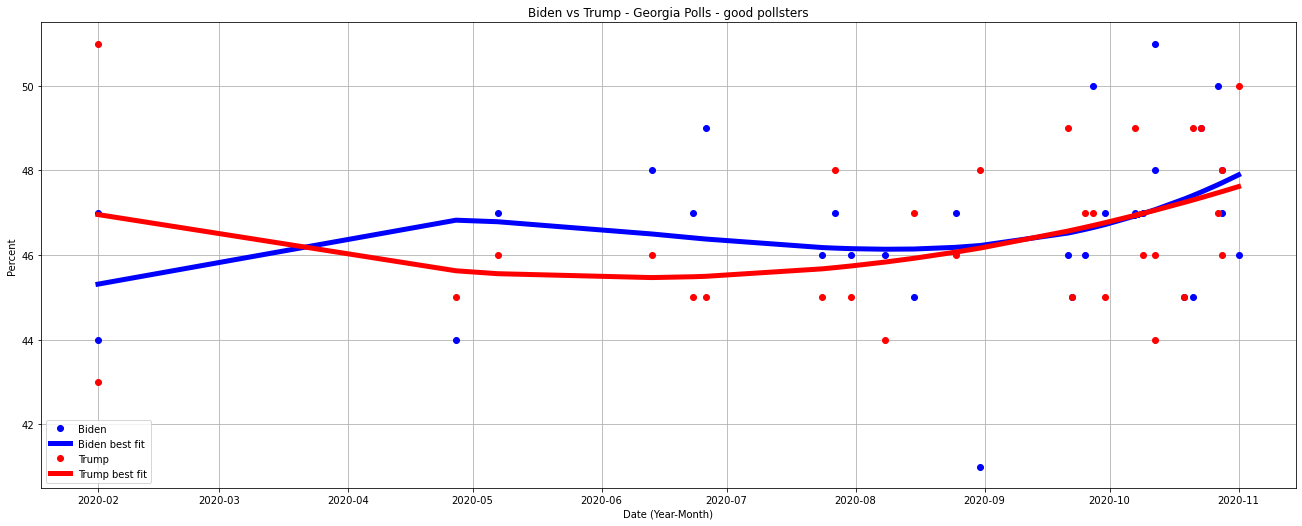

In [73]:
Image.open("Georgia_fit_good_pollsters.png")

In [74]:
print(biden_good_ga_y[0])

print(trump_good_ga_y[0])

47.89668745454401
47.61952341796132


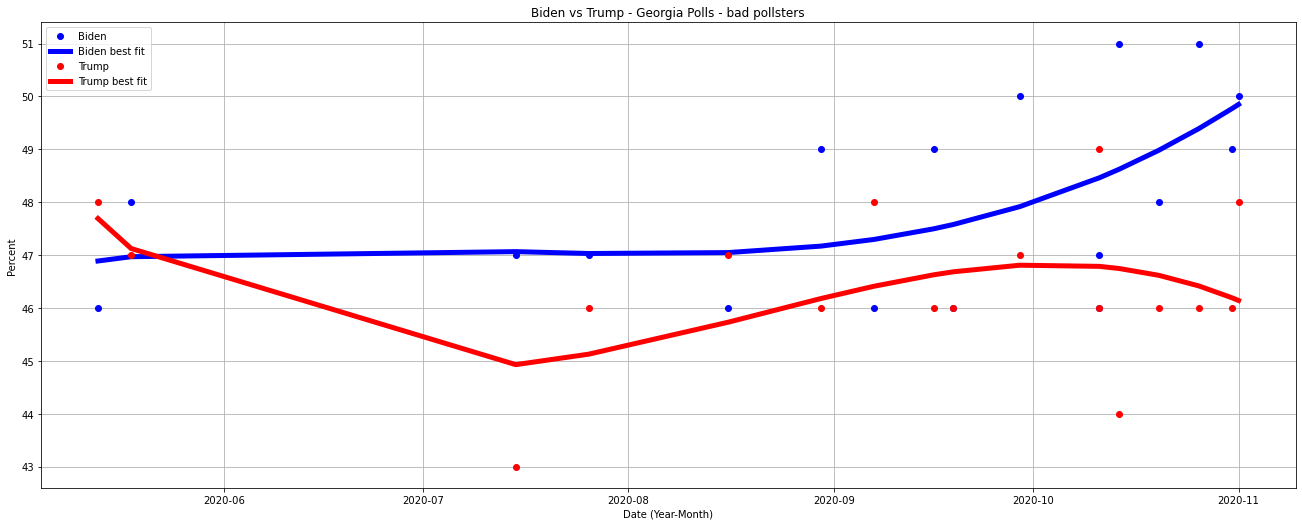

In [75]:
Image.open("Georgia_fit_bad_pollsters.png")

In [76]:
print(biden_bad_ga_y[0])

print(trump_bad_ga_y[0])

49.84962881356478
46.14140937849879


#### Pennsylvania Results

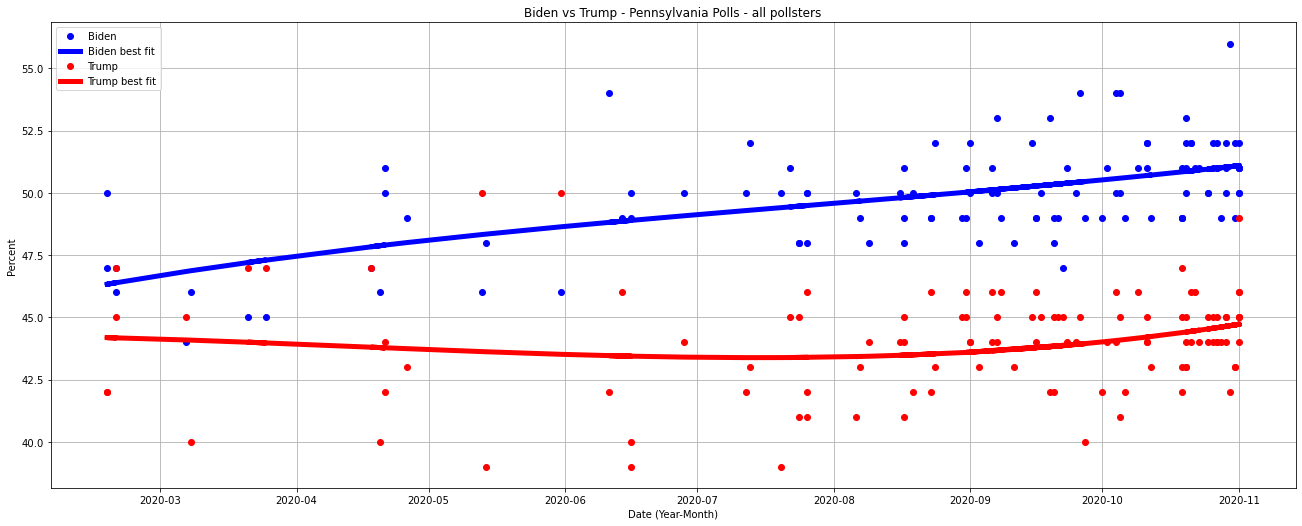

In [77]:
Image.open("pennsylvania_fit_all.png")

In [78]:
print(biden_pa_y[0])

print(trump_pa_y[0])

51.09251098474488
44.720987915527076


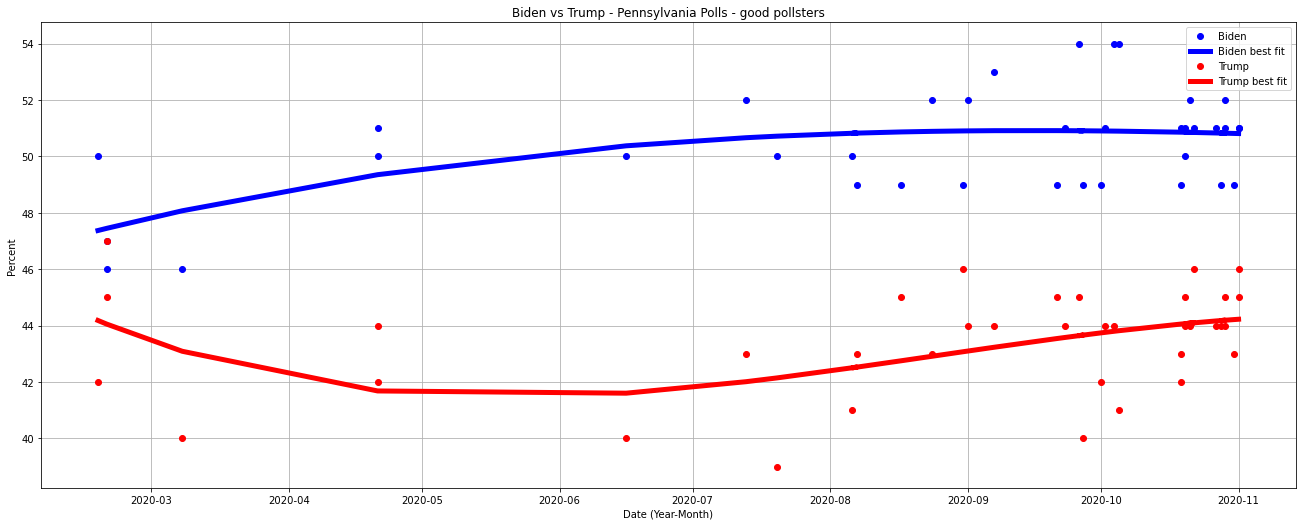

In [79]:
Image.open("Pennsylvania_fit_good_pollsters.png")

In [80]:
print(biden_good_pa_y[0])

print(trump_good_pa_y[0])

50.80914330435917
44.22581840120256


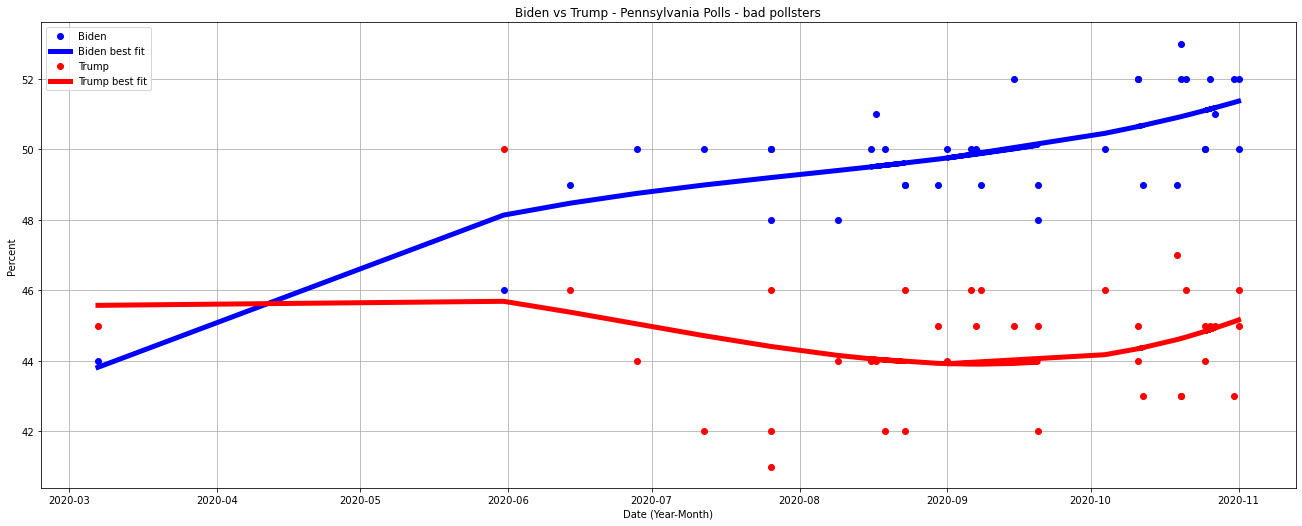

In [81]:
Image.open("Pennsylvania_fit_bad_pollsters.png")

In [82]:
print(biden_bad_pa_y[0])

print(trump_bad_pa_y[0])

51.36720249988139
45.16087035089731


## Overall Results for Part One 

###### For national polling:

All Polls =  Biden : 52.22 % , Trump: 43.10 %

Great Polls = Biden: 50.31 % , Trump: 43.04 %

Bad Polls = Biden: 51.10 % , Trump: 42.70 %

----------------------------------------------------


Biden Difference from All to great: 1.91

Biden Differnece from All to bad: 1.12

Biden Differnce from Great to Bad: -0.79

------------------------------------------------------

Trump Difference from All to great: 0.06

Trump Differnece from All to bad: 0.4

Trump Differnce from Great to Bad: 0.34

-------------------------------------------------------
###### For Georgia polling:

All Polls =  Biden : 48.66 % , Trump: 47.44 %

Good Polls = Biden: 47.90 % , Trump: 47.62 %

Bad Polls = Biden: 48.85 % , Trump: 46.14 %

----------------------------------------------------------

Biden Difference from All to good: 0.76

Biden Differnece from All to bad:  -0.19

Biden Differnce from Good to Bad: -0.95

-------------------------------------------------------------

Trump Difference from All to good: -0.18

Trump Differnece from All to bad: 1.30

Trump Differnce from Good to Bad: 1.48


###### For Pennsylvania polling:

All Polls =  Biden : 51.09 % , Trump: 44.72 %

Good Polls = Biden: 50.81 % , Trump: 44.23 %

Bad Polls = Biden: 51.37 % , Trump: 45.16 %

---------------------------------------------

Biden Difference from All to good: 0.28

Biden Differnece from All to bad:  -0.38

Biden Differnce from Good to Bad: -0.56

----------------------------------------------

Trump Difference from All to good: 0.49

Trump Differnece from All to bad: -0.44

Trump Differnce from Good to Bad: -0.93




## Part Two Results

#### Income Section

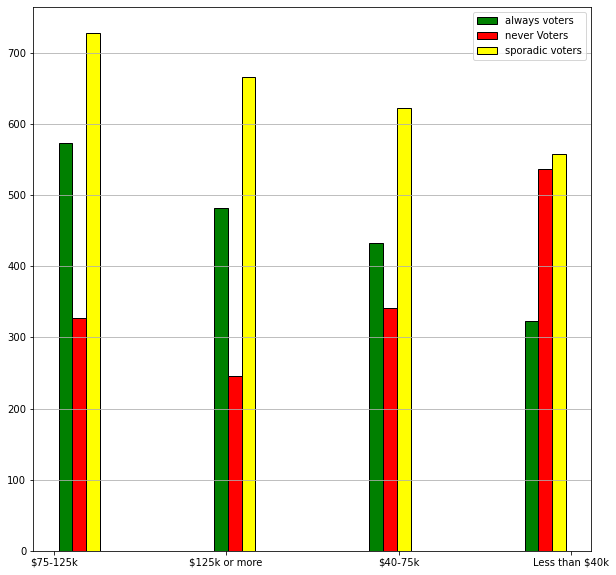

In [83]:
Image.open("all_income_hist.png")

In [84]:
print(income_percent_always) #Order is smallest to largest, not associtated with the above plot
print(income_percent_never) #Order is smallest to largest, not associtated with the above plot
print(income_percent_spor) #Order is smallest to largest, not associtated with the above plot

(17.84, 23.91, 31.64, 26.62)
(37.01, 23.5, 22.54, 16.95)
(21.68, 24.16, 28.28, 25.87)


#### Education Section

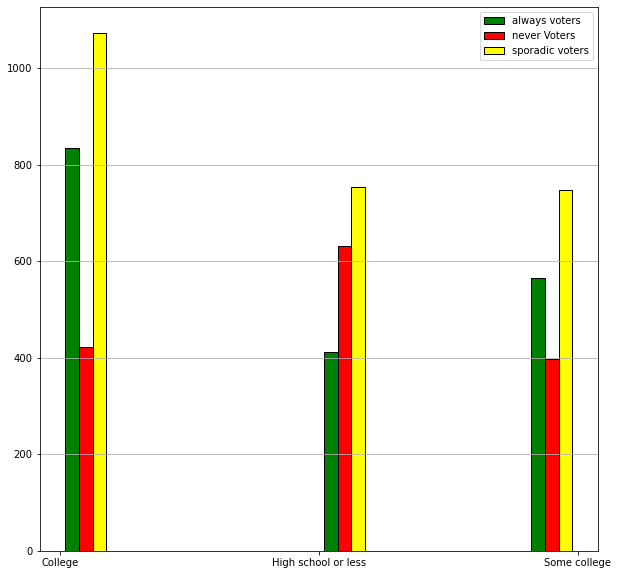

In [85]:
Image.open("all_education_hist.png")

In [86]:
print(educ_percent_always) #Order is HS or less, some college, college. Not associated with the plot above. 
print(educ_percent_never) #Order is HS or less, some college, college. Not associated with the plot above.
print(educ_percent_spor) #Order is HS or less, some college, college. Not associated with the plot above.

(22.69, 31.25, 46.05)
(43.49, 27.36, 29.15)
(29.29, 29.02, 41.69)


#### Important Question Section

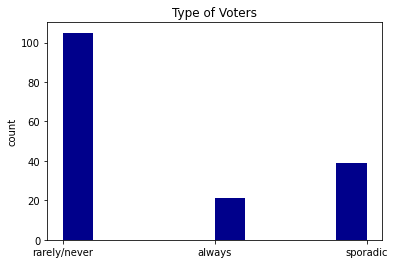

In [87]:
Image.open("assumed_non_voters_type_hist.png")

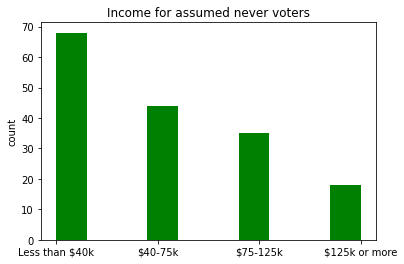

In [88]:
Image.open("assumed_non_voters_income_hist.png")

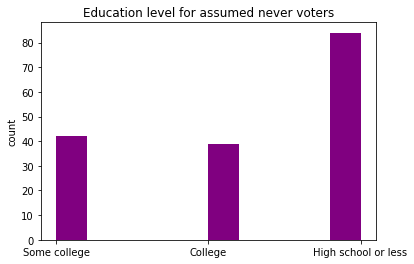

In [89]:
Image.open("assumed_non_voters_educ_hist.png")

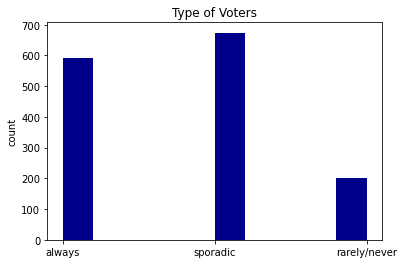

In [90]:
Image.open("assumed_always_voters_type_hist.png")

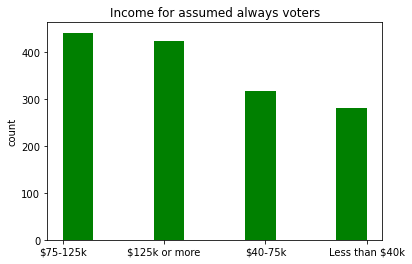

In [91]:
Image.open("assumed_always_voters_income_hist.png")

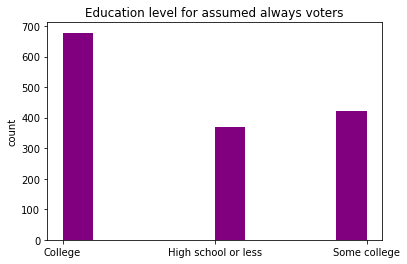

In [92]:
Image.open("assumed_always_voters_educ_hist.png")

## Overall Results for Part Two


### Income:

###### Always Voters:

17.84 % make 40k or less

23.91 % make between  40k  and 75k

31.64 % make between  75k and  125k

26.62 % make 125k or more 

###### Never Voters:

37.01 % make 40k or less

23.50 % make between 40k and 75k

22.54 % make between 75k and 125k

16.95 % make 125k or more 

###### Sporadic Voters:

21.68 % make 40k or less

24.16 % make between 40k and 75k

28.28 % make between 75k and 125k

25.87 % make 125k or more 


### Education:

###### Always Voters:

22.69 % have a High School or less education

31.25 % have some college education

46.05 % have a college education


###### Never Voters:

43.49 % have a High School or less education

27.36 % have some college education

29.15 % have a college education


###### Sporadic Voters:

29.29 % have a High School or less education

29.02 % have some college education

41.69 % have a college education


### Important Question Section:

In the assumed non voters dataframe, a majority of the voters were "rarely/never". A majority of these voters from these specific questions make less than 40k and have an ediucation level of High School or less.

In the assumed always voters dataframe, a majority of voters were sporadic voters. A majority of these voters from these specific questions make 75k to 125k and have an education level of college

# Discussion

### Part One (polling):

#### Comparing the real results to the fits:


For this discussion,  I will be referencing the New York Times election map (https://www.nytimes.com/interactive/2020/11/03/us/elections/results-president.html). All percentages referenced in this section were taken from the website on December 7th.

According to the NYT, Joe Biden has received 51.3 % of the popular vote and Donald Trump has received 46.9% of the popular vote. Looking at this result as a whole, from the three types of fit I did for the polling, the best overall model was the fit which included all of the polls. All three national fits underestimate Donald Trump. The best trump prediction was the “All polls” fit which placed him at 43.10 %.  The best Biden prediction was the “bad polls” fit which placed Biden at 51.10%. Biden outperformed the fits generated by the “bad polls fit” and the  “All Polls” fit. Biden underperformed the “great polls” fit.  The disparity between the fits and the actual results for Trump can most likely be explained by Libertarian Candidate Jo Jorgensen receiving more votes than expected.

At this point in time, Joe Biden has received 49.50 % of the vote in Georgia while Donald Trump has received 49.26 %.  When comparing to my fits, Joe Biden outperformed each one. Donald Trump outperformed every fit. Once again, the best fit overall fit for Georgia was the “All Polls” fit. Looking at each individual result, the closest Biden result came from the “Bad Polls” fit and the best Trump result came from the “All polls” fit. All fits for Georgia overestimated the vote tally for Jo Jorgensen (and other third-party candidates). 

In Pennsylvania, Joe Biden has received 50.0 % of the vote where Donald Trump has received 48.8 % of the vote. Compared to my fits, Joe Biden underperformed every single one where Trump outperformed every single one. Again, the best overall fit was the “All Polls” fit. The best Biden fit was the “Good Polls” fit where the best Trump fit was the “Bad Polls” fit.

These three results are very interesting to me. First off, every single overall best fit was the “All Polls” fit. I expected this. Since it had the most data points and included all polls that were in the “Bad Polls” fit and the “Good Polls” fit along with every poll not in those two categories it was most likely to be the most accurate. The next thing that was interesting to me was that when looking at each individual fit there was no consistent outperformer. It seems like it depends on the state you are looking at. When looking at all six fit lines, the “All Polls” predicted 2 correctly (Both for Trump), the “Good Polls” predicted 1 correctly (One for Biden). The Bad Polls predicted (two for Biden, one for Trump). The fact that the “Bad Polls” fit had the most correct is not entirely surprising. It isn’t spurring because, for one, it only predicted one more than the others, and two, bad polls usually predict on the extreme side of things, it just happens that this election showed that the extremes can still happen. Also, “bad polls” aren’t actually that bad. They are only bad because they could have had bad results before or their methodology could have been flawed before and changed for this election. Overall, the polls this election were not entirely accurate.

#### Comparing The differences of the fits:

When looking at how the different ratings of pollsters predicted things (not compared to the actual results), I am going to use the “All Polls” fit as a baseline to compare the others. 

For national polling, both the “Good Polls” and “Bad polls” for each candidate ended greater than the “all polls” fit.  

For Georgia polling,  the “Good Polls” fit for Biden ended higher but for Trump, it ended lower,  The “Bad Polls” fit ended lower for Biden but higher for Trump. 

For Pennsylvania polling,  the “Good Polls” fit for both Biden and Trump ended higher, and the “Bad Polls” fit for both Biden and Trump finished lower.

The above three results show me that for at least my fits, there was no consistent pattern in the difference in polling. 

#### Reflection On Part One:

A ran into some problems in this section of my work. Originally this was supposed to be a “prediction” where I let the best fit continue because I was only going to fit the polls up to October. This did not work out because the datatypes and transferring between pandas and Numpy and Matplotlib were giving me a lot of issues, especially when trying to extend the dates. Overall, I would like to use more polls, especially for the state polling so I could make a better fit. Unfortuerntly this isn’t possible because I do not make the polls and polling in the real world is very expensive.   

### Part Two (Why People Do Not Vote):

When exploring the question of why people don’t vote, I thought the best thing to do was look at some stats behind the people who are “always voters”, “never voters” (this includes almost never voters as well), and “sporadic voters”.  I think the best thing to look at is someone’s education level and how much money they make.  In this dataset, there are 1451 never/almost never voters,  1811 always voters, and 2574 and sporadic voters.

#### Income 

Of the Always Voters:

17.84 % make 40k or less , 23.91 % make between  40k  and 75k , 31.64 % make between  75k and  125k and 26.62 % make 125k or more.

Of the Never Voters:

37.01 % make 40k or less, 23.50 % make between 40k and 75k , 22.54 % make between 75k and 125k and 16.95 % make 125k or more.


Of the Sporadic Voters: 

21.68 % make 40k or less, 24.16 % make between 40k and 75k, 28.28 % make between 75k and 125k and 25.87 % make 125k or more 

Looking at an always voter compared to a never voter tells me that someone is more likely to vote the more money they make.  A sporadic voter is someone who makes any amount of money.

----------------------------------------------------------------------------------------

#### Education

Of the Always Voters:

22.69 % have a High School or less education , 31.25 % have some college education and 46.05 % have a college education


Of the Never Voters: 

43.49 % have a High School or less education , 27.36 % have some college education and 29.15 % have a college education


Of the Sporadic Voters:

29.29 % have a High School or less education , 29.02 % have some college education and 41.69 % have a college education

Looking at an always voter compared to a never voter tells me that someone is more likely to vote the more educated they are. A sporadic voter is someone who most likely college-educated but can also have any other education as well. 


#### Important Questions:


The first question I decided on was question 5 in the dataset, “As far as making progress on the important issues facing the country, does it really matter who wins the 2020 presidential election, or will things be pretty much the same regardless of who is elected president?”  The participant had two options for answers: 1. Who wins the election really matters and 2. Things will be pretty much the same. 

I thought this was a really important question because someone who thinks nothing will be different is way less likely to vote because they think that their vote doesn’t mean anything whereas someone who thinks their vote matters will be more likely to vote. 

The second question was number six in the data set, “In general, how many of the people in elected office today are like you?” They had four options for an answer: 1. A lot, 2. Some, 3. Only a Few, 4. None. 

This also is an important question because I hypothesize someone who thinks the people that represent them are like them are more likely to vote than if they think the elected officials aren’t like them. 

The last question was number sixteen in the dataset, this question asks, “ In general, how easy or difficult do you think it is to vote in national elections?” The options for answers were: 1. Very Easy, 2. Somewhat Easy, 3. Somewhat Difficult, 4. Very Difficult.

I hypothesize that someone who thinks it is hard to vote will not vote, it is that simple. 

-------

After deciding on these questions I made two data frames with answers, someone who usually votes and someone who usually does not vote. The results of these dataframes (as shown above) tell me a lot of things. First, it shows me that my predictions were correct. Someone who doesnt think anything will change, elected officals arent like them and thinks it is hard to vote will not vote. These results also are consisnt with the never voters as a majority of these voters from these specific questions make less than 40k and have an ediucation level of High School or less. I was not correct about the people who thought things will change, elected officals are like them and it is easy to vote. I thought a majority of these people wpuld be always voters but they were not, a majority of them were sporadic voters.  The income level and education level are also consistent with those of sporadic voters.

#### Reflection On Part Two:

I did not really have any issues with this part of the project. If I could go back, I would include more questions in the "important questions" section. I would maybe also try to look at the race of the people in the dataset as well to see if there is any correlation there. 

# Conclusion

Overall, I had a great time doing this project. I was able to explore more of Python and Jupyter Notebook. As I stated in the introduction, I love politcs and numbers so I never got bored of working on this. I look forward to foving on in my data science/programming carrer and I am happy this was the first step in that process as this is my first programming prject ever.

# References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

Fivethirtyeight. “Fivethirtyeight/Data.” GitHub, github.com/fivethirtyeight/data/tree/master/non-voters. 

Jitender_1998. “Create a Column Using for Loop in Pandas Dataframe.” GeeksforGeeks, 8 Jan. 2019, www.geeksforgeeks.org/create-a-column-using-for-loop-in-pandas-dataframe/. (I didn't copy it I just want to make sure I do not get in trouble)

NateSilver538. “Pollster Ratings.” FiveThirtyEight, 19 May 2020, projects.fivethirtyeight.com/pollster-ratings/. 

“President-Forecasting the US 2020 Elections.” The Economist, The Economist Newspaper, projects.economist.com/us-2020-forecast/president. 

